In [1]:
import numpy as np
import pandas as pd
from Bio import SeqIO
from Bio.Seq import Seq
import Bio.SeqUtils.MeltingTemp as mt
import os

from dredFISH.Utils.__init__plots import *

In [2]:
def parse_encoding(seq, option='+'):
    # P1-R-a-E-a-R-a-R-P2
    breakpoints = np.array([0, 20, 40, 41, 71, 72, 92, 93, 113, 133])
    if option == '+': # 1R-2R
        bp = breakpoints
        
        p1 = seq[bp[0]:bp[1]]
        R1 = seq[bp[1]:bp[2]]
        s1 = seq[bp[2]:bp[3]]
        E  = seq[bp[3]:bp[4]]
        s2 = seq[bp[4]:bp[5]]
        R2 = seq[bp[5]:bp[6]]
        s3 = seq[bp[6]:bp[7]]
        R3 = seq[bp[7]:bp[8]]
        p2 = seq[bp[8]:bp[9]]
        
        return E, R1, R2, R3, p1, p2, s1, s2, s3,  
        
    if option == '-': # 2R-1R
        bp = (133 - breakpoints)[::-1]
    
        p1 = seq[bp[0]:bp[1]]
        R1 = seq[bp[1]:bp[2]]
        s1 = seq[bp[2]:bp[3]]
        R2 = seq[bp[3]:bp[4]]
        s2 = seq[bp[4]:bp[5]]
        E  = seq[bp[5]:bp[6]]
        s3 = seq[bp[6]:bp[7]]
        R3 = seq[bp[7]:bp[8]]
        p2 = seq[bp[8]:bp[9]]
        
        return E, R1, R2, R3, p1, p2, s1, s2, s3,  

In [3]:
def recalc_tm(seq, fmd=0, Na=1e-5, dnac1=0, dnac2=0):
    """
    """
    res = mt.Tm_NN(seq, Na=Na, dnac1=dnac1, dnac2=dnac2)
    res = mt.chem_correction(res, fmd=fmd)
    return res
    
def get_gc(seq):
    """
    """
    return (seq.count('G') + seq.count('C'))/len(seq)

In [4]:
f = "/bigstore/binfo/Probe_Sets/dredFISH_Final_Oligos.fasta"
resall = []
# encseqs = []
rdtseqs = []
rdtnames = []
for i, record in enumerate(SeqIO.parse(f, "fasta")):
    seq = record.seq
    dsp = record.description
    
    if dsp.split(' ')[4].startswith('RS'):
        option = '-' # R[R]ER
    else:
        option = '+' # R[E]RR
        
    E, R1,R2,R3, p1,p2, s1,s2,s3 = parse_encoding(seq, option=option)
    if (str(s1),str(s2),str(s3)) == ('A', 'A', 'A'):
        pass
    else:
        print(s1,s2,s3)
        break
    assert R1 == R2
    assert R1 == R3
    
    # encseqs.append(str(E))
    rdtseqs.append(str(R1))
    rdtnames.append(dsp.split(' ')[3])
    
    # if i > 100:
    #     break

# get all sequences
- primers 3set
- readout probes 24 + 1
- encodings 3 set

In [5]:
ddir = "/bigstore/GeneralStorage/fangming/projects/dredfish/res_seq"

In [6]:
f = os.path.join(ddir, "readouts_primers_candidates_Nov11_2022.csv") 
df = pd.read_csv(f, index_col=0)
df

,name,seq,4monomer,gc,endT,tm,dfttm,ourtm,mattm,self_complementarity
0,RS0095_cy5,AGAGTGAGTAGTAGTGGAGT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RS0109_cy5,TGTGATGGAAGTTAGAGGGT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RS0175_cy5,TGAAAGGAATGGGTTGTGGT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RS0237_cy5,GGGTTGATTAGTGGTAGAAA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,RS0307_cy5,TGTGGAGGGATTGAAGGATA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,RS0332_cy5,GGGAGAATGAGGTGTAATGT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,RS0384_atto565,TAGAGTTGATAGAGGGAGAA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,RS0406_atto565,GATGATGTAGTAGTAAGGGT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,RS0451_atto565,GGAGTAGTTGGTTGTTAGGA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,RS0468_atto565,AGGAGGAGGGTAATGATAGA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Design primers

TODO:
- which Tm?

In [7]:
def check_monomer(seq):
    return seq.count('AAAA')+seq.count('TTTT')+seq.count('GGGG')+seq.count('CCCC')

def count_kmers(sequence, k_size):
    """https://voorloopnul.com/blog/kmer-analysis-with-python/
    """
    data = {}
    size = len(sequence)
    for i in range(size - k_size + 1):
        kmer = sequence[i: i + k_size]
        try:
            data[kmer] += 1
        except KeyError:
            data[kmer] = 1
    return pd.Series(data)

def self_complementarity_check(seq, k, summary=True):
    """self complemtary means the seq and its reverse complement share k-mers
    In its current form, the results devalues palindromic k-mers, which will result in 0.5 ...
    """
    
    res1 = count_kmers(seq, k)
    res2 = count_kmers(seq.reverse_complement(), k)
    res = pd.concat([res1, res2], axis=1).dropna().astype(int) # res will be nonzero if they share k-mer
    if summary:
        # return len(res) != 0
        return res.min(axis=1).sum()/2 # number of kmer overlap, /2 because of double count
    else:
        return res 

def orthogonality_check(seq1, seq2, k, summary=True):
    """orthogonality means the seq and its reverse complement share k-mers
    In its current form, the results devalues palindromic k-mers, which will result in 0.5 ...
    """
    
    res1f = count_kmers(seq1, k)
    res1r = count_kmers(seq1.reverse_complement(), k)
    # kmer profile
    res1 = pd.concat([res1f, res1r], axis=1).fillna(0).sum(axis=1) 
    
    res2f = count_kmers(seq2, k)
    res2r = count_kmers(seq2.reverse_complement(), k)
    res2 = pd.concat([res2f, res2r], axis=1).fillna(0).sum(axis=1) 
    
    res = pd.concat([res1, res2], axis=1).dropna().astype(int) # res will be nonzero if they share k-mer
    if summary:
        # return len(res) != 0
        return res.min(axis=1).sum()/2 # number of kmer overlap, /2 because of double count
    else:
        return res 

In [8]:
df['4monomer'] = df['seq'].apply(check_monomer)
df['gc']    = df['seq'].apply(get_gc) 
df['endT']  = df['seq'].apply(lambda x: x.endswith('T'))

df['tm']    = df['seq'].apply(lambda x: recalc_tm(x, fmd=0, Na=1, dnac1=25, dnac2=25))
df['dfttm'] = df['seq'].apply(lambda x: recalc_tm(x, fmd=50, Na=390, dnac1=25, dnac2=25))
df['ourtm'] = df['seq'].apply(lambda x: recalc_tm(x, fmd=30, Na=300, dnac1=2,  dnac2=0.001))
df['mattm'] = df['seq'].apply(lambda x: recalc_tm(x, fmd=0,  Na=300, dnac1=2,  dnac2=2))  
print(df.shape)
df

(45, 10)


,name,seq,4monomer,gc,endT,tm,dfttm,ourtm,mattm,self_complementarity
0,RS0095_cy5,AGAGTGAGTAGTAGTGGAGT,0,0.45,True,30.067834,25.862302,34.850408,53.357011,NaN
1,RS0109_cy5,TGTGATGGAAGTTAGAGGGT,0,0.45,True,31.394011,27.427118,36.380189,54.878178,NaN
2,RS0175_cy5,TGAAAGGAATGGGTTGTGGT,0,0.45,True,33.120229,29.218720,38.163519,56.659409,NaN
3,RS0237_cy5,GGGTTGATTAGTGGTAGAAA,0,0.40,False,28.678678,24.038153,33.091074,51.613566,NaN
4,RS0307_cy5,TGTGGAGGGATTGAAGGATA,0,0.45,False,30.990824,27.198931,36.124946,54.616351,NaN
5,RS0332_cy5,GGGAGAATGAGGTGTAATGT,0,0.45,True,30.748046,26.323377,35.345460,53.860329,NaN
6,RS0384_atto565,TAGAGTTGATAGAGGGAGAA,0,0.40,False,27.536690,23.361077,32.342150,50.847155,NaN
7,RS0406_atto565,GATGATGTAGTAGTAAGGGT,0,0.40,True,27.302488,22.621112,31.678933,50.202684,NaN
8,RS0451_atto565,GGAGTAGTTGGTTGTTAGGA,0,0.45,False,30.414999,25.885229,34.922966,53.441672,NaN
9,RS0468_atto565,AGGAGGAGGGTAATGATAGA,0,0.45,False,29.338207,25.670857,34.576223,53.062668,NaN


<AxesSubplot:xlabel='dfttm', ylabel='Count'>

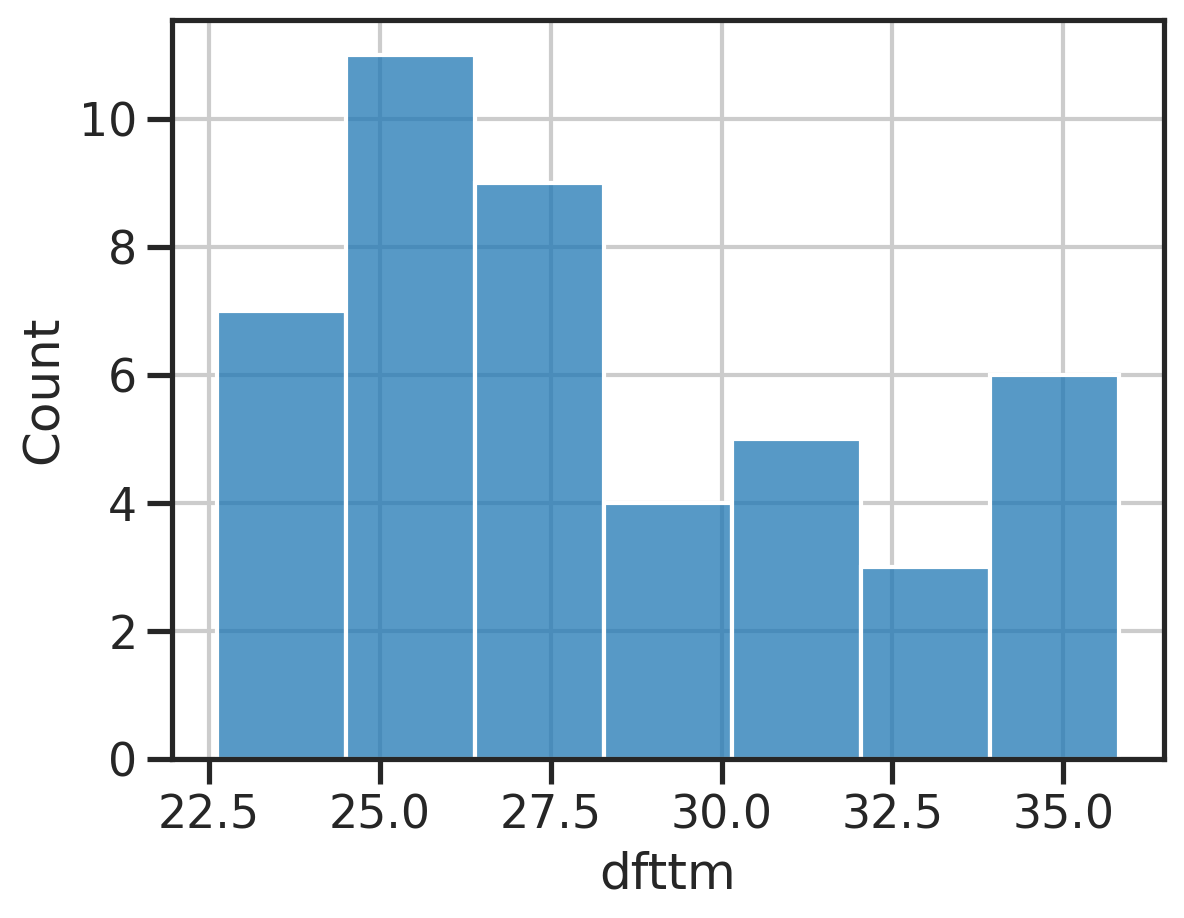

In [9]:
sns.histplot(df['dfttm'])

# check self-complementarity
- self comlementarity: a subset of the sequence followed by its reverse complement
    - to test: if the sequence and its reverse complement share the same k-mer

In [10]:
%%time
k = 3
df['self_complementarity'] = df['seq'].apply(lambda x: self_complementarity_check(Seq(x), k))
df

CPU times: user 200 ms, sys: 26.3 ms, total: 226 ms
Wall time: 208 ms


,name,seq,4monomer,gc,endT,tm,dfttm,ourtm,mattm,self_complementarity
0,RS0095_cy5,AGAGTGAGTAGTAGTGGAGT,0,0.45,True,30.067834,25.862302,34.850408,53.357011,0.0
1,RS0109_cy5,TGTGATGGAAGTTAGAGGGT,0,0.45,True,31.394011,27.427118,36.380189,54.878178,0.0
2,RS0175_cy5,TGAAAGGAATGGGTTGTGGT,0,0.45,True,33.120229,29.218720,38.163519,56.659409,0.0
3,RS0237_cy5,GGGTTGATTAGTGGTAGAAA,0,0.40,False,28.678678,24.038153,33.091074,51.613566,0.0
4,RS0307_cy5,TGTGGAGGGATTGAAGGATA,0,0.45,False,30.990824,27.198931,36.124946,54.616351,0.0
5,RS0332_cy5,GGGAGAATGAGGTGTAATGT,0,0.45,True,30.748046,26.323377,35.345460,53.860329,0.0
6,RS0384_atto565,TAGAGTTGATAGAGGGAGAA,0,0.40,False,27.536690,23.361077,32.342150,50.847155,0.0
7,RS0406_atto565,GATGATGTAGTAGTAAGGGT,0,0.40,True,27.302488,22.621112,31.678933,50.202684,0.0
8,RS0451_atto565,GGAGTAGTTGGTTGTTAGGA,0,0.45,False,30.414999,25.885229,34.922966,53.441672,0.0
9,RS0468_atto565,AGGAGGAGGGTAATGATAGA,0,0.45,False,29.338207,25.670857,34.576223,53.062668,0.0


<AxesSubplot:xlabel='self_complementarity', ylabel='Count'>

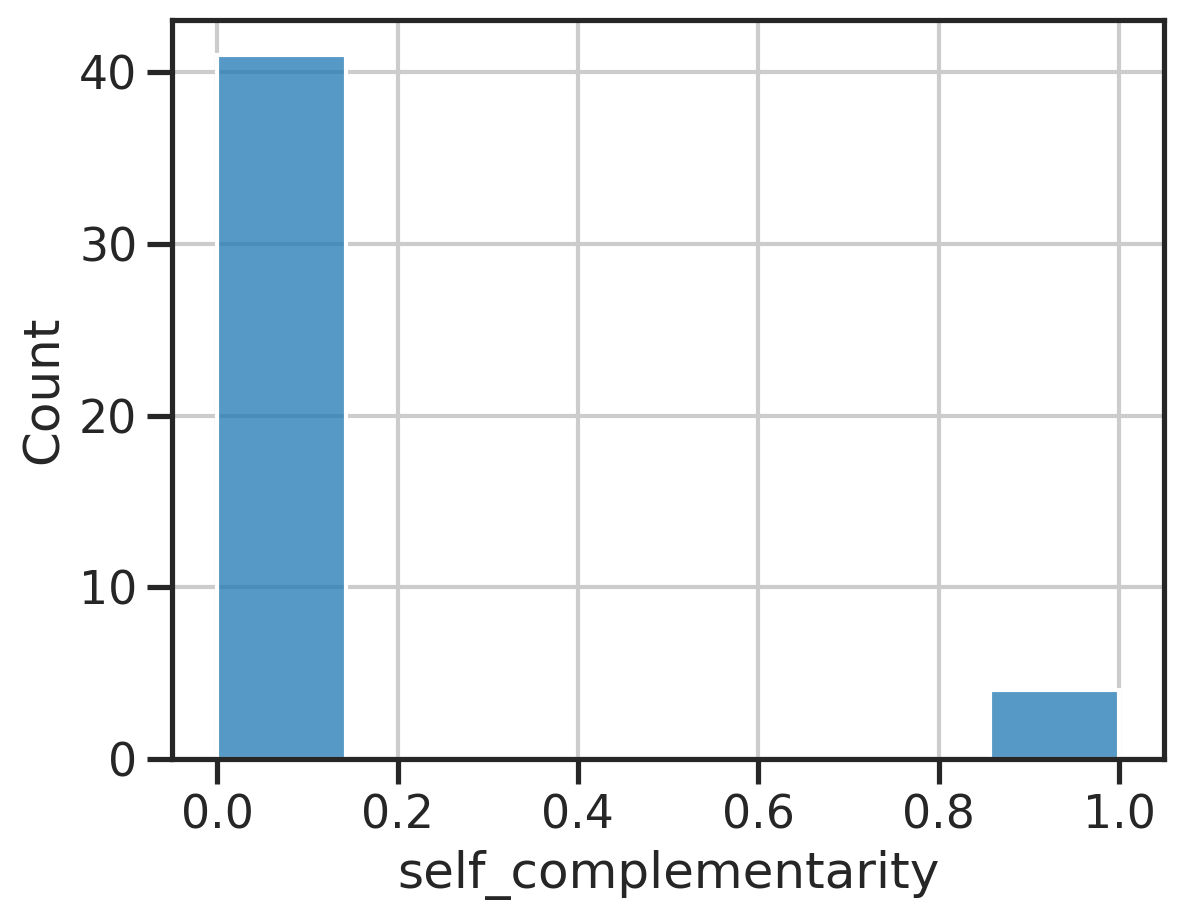

In [11]:
sns.histplot(df['self_complementarity'])

In [12]:
df[df['self_complementarity']==1]

,name,seq,4monomer,gc,endT,tm,dfttm,ourtm,mattm,self_complementarity
15,RS643.0_alexa488,GTATAAGGTGATTGGTGGTG,0,0.45,False,30.147846,25.185933,34.289008,52.823686,1.0
17,RS810.0_alexa488,GAGTGTGTGTTAAGGTAGGT,0,0.45,True,30.874335,26.190284,35.251879,53.776392,1.0
19,RSN1807.0_cy5,GGTGGTTGATTAAGGATGGT,0,0.45,True,31.224089,26.912067,35.917481,54.428258,1.0
21,RSN4287.0_atto565,GGAGGTTAGAATTTGTGAGG,0,0.45,False,30.015117,25.107214,34.201976,52.734629,1.0


# check orthogonality

In [13]:
def pairwise_test(seqs, k):
    """
    """
    n = len(seqs)
    print(n)

    prws_overlap = np.zeros((n,n)).astype(int)
    troubles = []
    trouble_pairs = []
    for i in range(n):
        for j in range(i+1, n):
            seq1 = Seq(seqs[i])
            seq2 = Seq(seqs[j])
            res = orthogonality_check(seq1, seq2, k)
            prws_overlap[i,j] = res
            prws_overlap[j,i] = res

            # print(i,j,res)

            if res > 0:
                troubles.append(i)
                troubles.append(j)
                trouble_pairs.append((i,j))

    troubles = np.unique(troubles)
    return prws_overlap, troubles, trouble_pairs

def plot_pairwise(prws_overlap, troubles, title):
    fig, ax = plt.subplots(figsize=(8,6))
    sns.heatmap(prws_overlap, 
                # xticklabels=troubles, 
                yticklabels=True,
                cmap='rocket_r', 
                cbar_kws=dict(shrink=0.5, label=f'Number of shared {k}-mers', ticks=np.arange(1+np.max(prws_overlap))),
                linewidths=1,
                linecolor='white',
                ax=ax)
    ax.set_title(title)
    ax.set_xticks(0.5+troubles)
    ax.set_xticklabels(troubles, fontsize=10)
    return ax

In [14]:
k = 8
seqs = df['seq'].values
n = len(seqs)
title = f"readouts and primers"

prws_overlap, troubles, trouble_pairs = pairwise_test(seqs, k)

45


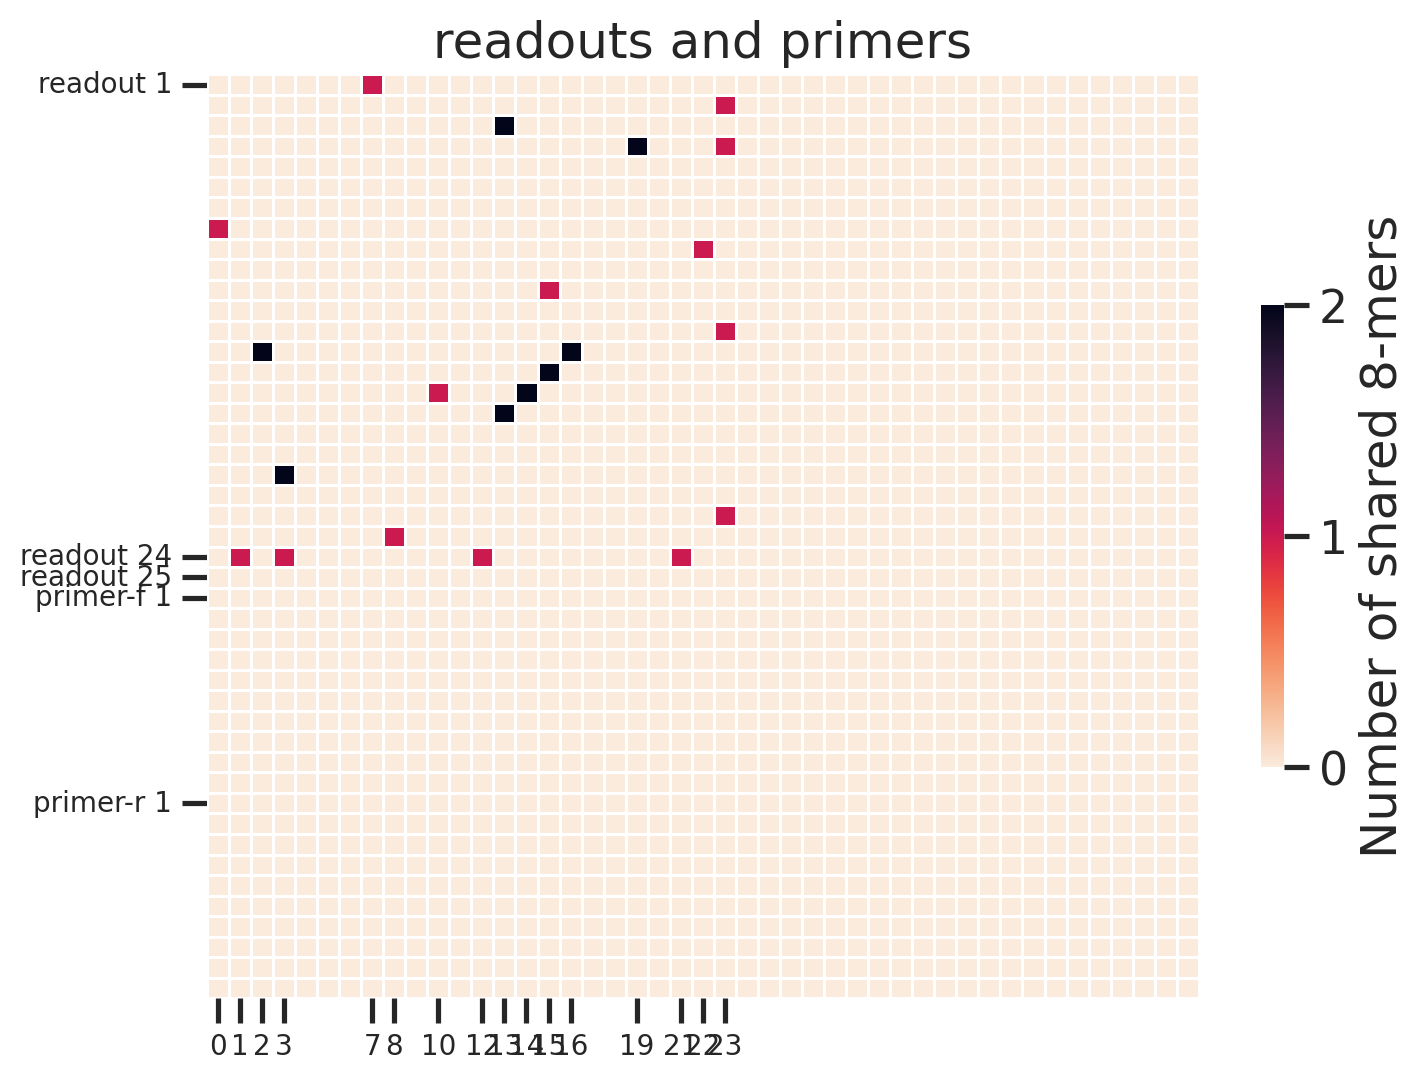

In [15]:
ax = plot_pairwise(prws_overlap, troubles, title)
ticks = [0, 23,  
         24, 
         25, 
         35, 
        ]
ticklabels = ['readout 1', 'readout 24', 'readout 25', 'primer-f 1', 'primer-r 1']

ax.set_yticks(np.array(ticks)+0.5)
ax.set_yticklabels(np.array(ticklabels), fontsize=10)
plt.show()

In [18]:
fout = os.path.join(ddir, 'primer_candidates_Nov15_2022.fasta')
with open(fout, 'w') as fh:
    for idx, item in df.iloc[25:].iterrows():
        fh.write(f">{item['name']}\n")
        fh.write(f"{item['seq']}\n")
        fh.write(f"\n")